<a href="https://colab.research.google.com/github/shoreey/Analysis-and-Detecting-Spam-Messages/blob/main/SMS_spam_collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import nltk
from nltk.corpus import stopwords


# Exploring the Dataset

In [ ]:
# Read the CSV file into a Pandas DataFrame
data = pd.read_excel("E:\spam.xlsx")

# Now, 'df' contains the Spam dataset


In [ ]:
data


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# A text length analysis for spam and non-spam messages

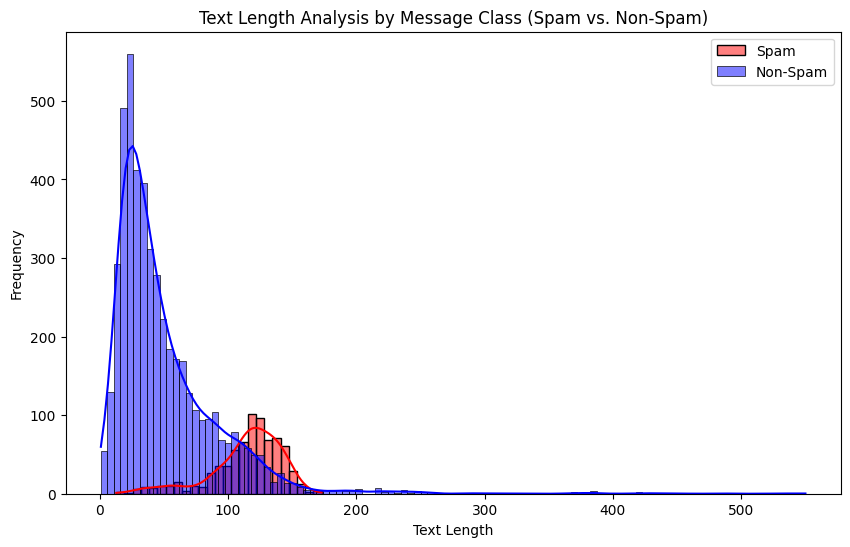

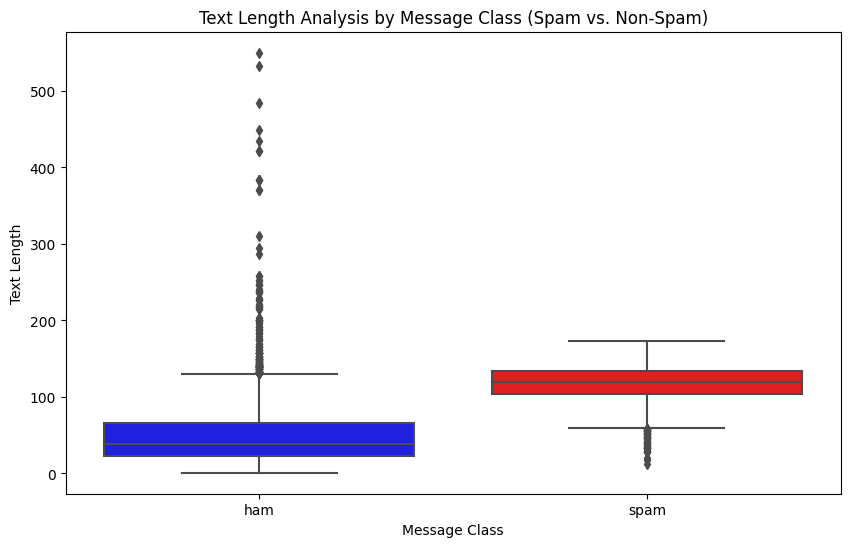

Summary Statistics for Text Length in Spam Messages:
count    747.000000
mean     114.855422
std       27.640414
min       13.000000
25%      104.000000
50%      119.000000
75%      134.000000
max      173.000000
Name: text_length, dtype: float64

Summary Statistics for Text Length in Non-Spam Messages:
count    4825.000000
mean       50.572642
std        41.787479
min         1.000000
25%        23.000000
50%        38.000000
75%        66.000000
max       550.000000
Name: text_length, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the length of text messages and create a new column in the DataFrame
data['text_length'] = data['v2'].apply(len)

# Separate spam and non-spam messages
spam_messages = data[data['v1'] == 'spam']
non_spam_messages = data[data['v1'] == 'ham']

# Plot histograms for text length by class
plt.figure(figsize=(10, 6))
sns.histplot(spam_messages['text_length'], color='red', label='Spam', kde=True)
sns.histplot(non_spam_messages['text_length'], color='blue', label='Non-Spam', kde=True)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.title('Text Length Analysis by Message Class (Spam vs. Non-Spam)')
plt.show()

# Plot box plots for text length by class
plt.figure(figsize=(10, 6))
sns.boxplot(x='v1', y='text_length', data=data, palette={'ham': 'blue', 'spam': 'red'})
plt.xlabel('Message Class')
plt.ylabel('Text Length')
plt.title('Text Length Analysis by Message Class (Spam vs. Non-Spam)')
plt.show()

# Summary statistics for text length by class
spam_summary = spam_messages['text_length'].describe()
non_spam_summary = non_spam_messages['text_length'].describe()

print("Summary Statistics for Text Length in Spam Messages:")
print(spam_summary)
print("\nSummary Statistics for Text Length in Non-Spam Messages:")
print(non_spam_summary)



# Distribution of "ham" and "spam"

v1
ham     4825
spam     747
Name: count, dtype: int64


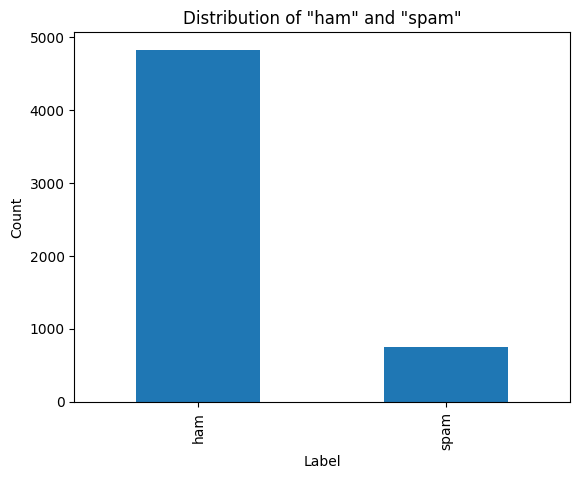

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the 'data' DataFrame from your previous code

# Check the distribution of 'ham' and 'spam' labels
label_distribution = data['v1'].value_counts()

# Print the distribution
print(label_distribution)

# Plot the distribution
label_distribution.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of "ham" and "spam"')
plt.show()


#  Handling imbalanced classes

In [ ]:
import pandas as pd
from sklearn.utils import resample

# Assuming you already have the 'data' DataFrame from your previous code

# Separate the "ham" and "spam" classes
ham = data[data['v1'] == 'ham']
spam = data[data['v1'] == 'spam']

# Oversample the "spam" class to make it even with "ham"
spam_oversampled = resample(spam, replace=True, n_samples=len(ham), random_state=42)

# Combine the oversampled "spam" with the original "ham" to create a balanced dataset
balanced_data = pd.concat([ham, spam_oversampled])

# Check the distribution in the balanced dataset
balanced_distribution = balanced_data['v1'].value_counts()
print(balanced_distribution)


v1
ham     4825
spam    4825
Name: count, dtype: int64


# Distribution after Handling data

v1
ham     4825
spam    4825
Name: count, dtype: int64


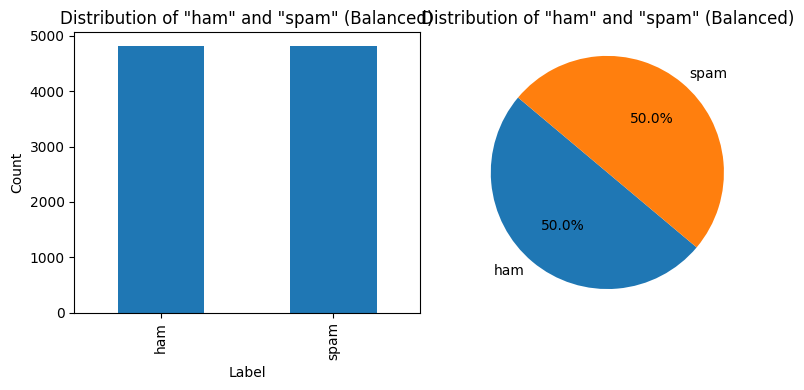

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the 'balanced_data' DataFrame from the previous code

# Check the distribution in the balanced dataset
balanced_distribution = balanced_data['v1'].value_counts()

# Print the distribution
print(balanced_distribution)

# Plot the distribution as a bar chart
plt.figure(figsize=(8, 4))
plt.subplot(121)
balanced_distribution.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of "ham" and "spam" (Balanced)')

# Plot the distribution as a pie chart
plt.subplot(122)
plt.pie(balanced_distribution, labels=balanced_distribution.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of "ham" and "spam" (Balanced)')

plt.tight_layout()
plt.show()


# word Cloud for Ham and Spam

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


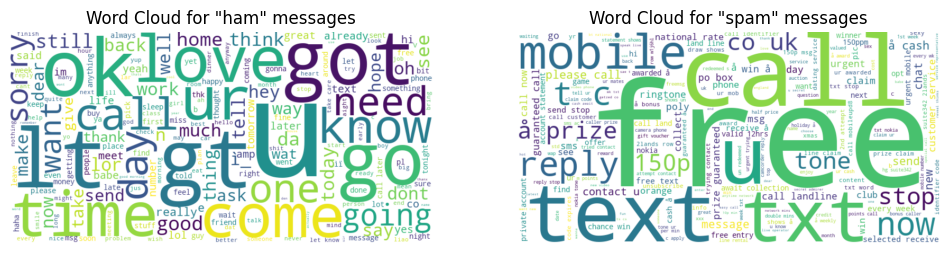

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['v2'] = data['v2'].astype(str)  # Convert all values in the 'v2' column to strings
data['v2'] = data['v2'].str.lower()
data['v2'] = data['v2'].str.replace('[^\w\s]', '')  # Remove punctuation
data['v2'] = data['v2'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Create a word cloud for "ham" and "spam" messages
ham_messages = " ".join(data[data['v1'] == 'ham']['v2'])
spam_messages = " ".join(data[data['v1'] == 'spam']['v2'])

wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_messages)
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_messages)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Word Cloud for "ham" messages')
plt.axis('off')

plt.subplot(122)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Word Cloud for "spam" messages')
plt.axis('off')

plt.show()


# Frequency of words in ham and Spam

Most frequent words in non-spam messages:
   words in non-spam  count
0                  u    874
1                i'm    369
2                get    293
3                  2    284
4          &lt;#&gt;    276
5                 go    235
6                 ur    235
7                got    227
8                  .    222
9               like    221
10              call    215
11              come    215
12              know    208
13              good    187
14                 ?    181
15              i'll    167
16               ...    162
17             going    157
18                ok    156
19                 4    156

Most frequent words in spam messages:
   words in spam  count_
0           call     342
1           free     180
2              2     169
3             ur     144
4            txt     136
5              u     117
6           text     112
7         mobile     109
8          claim     106
9          reply     101
10             &      98
11             4      93
12    

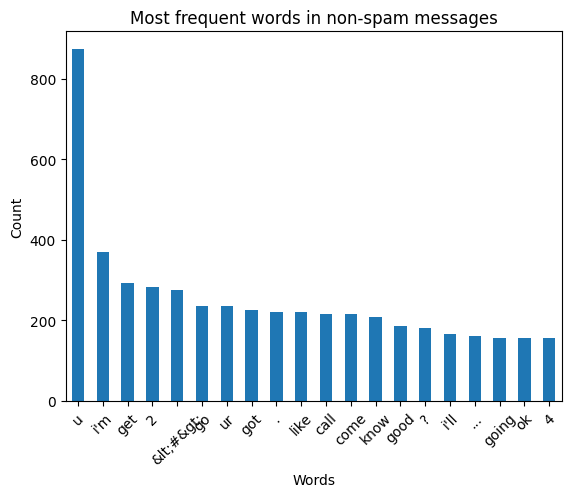

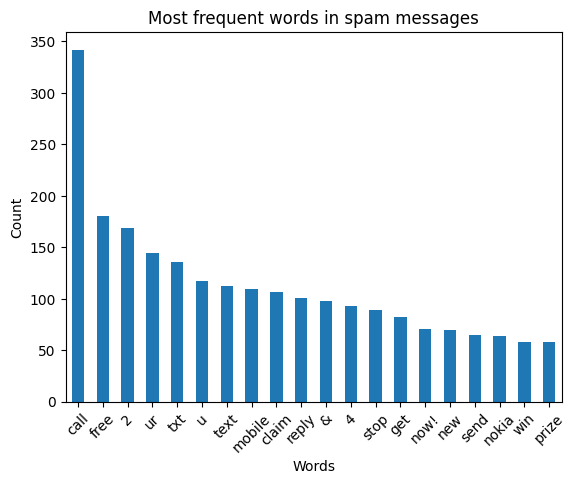

In [ ]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Count the most common words in non-spam messages
count1 = Counter(" ".join(data[data['v1'] == 'ham']["v2"]).split()).most_common(20)
df1 = pd.DataFrame(count1, columns=["words in non-spam", "count"])

# Count the most common words in spam messages
count2 = Counter(" ".join(data[data['v1'] == 'spam']["v2"]).split()).most_common(20)
df2 = pd.DataFrame(count2, columns=["words in spam", "count_"])

# Print the most frequent words and their numbers in non-spam messages
print("Most frequent words in non-spam messages:")
print(df1)

# Print the most frequent words and their numbers in spam messages
print("\nMost frequent words in spam messages:")
print(df2)

# Plot the most frequent words in non-spam messages
df1.plot.bar(x="words in non-spam", y="count", legend=False)
plt.xticks(rotation=45)
plt.title('Most frequent words in non-spam messages')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

# Plot the most frequent words in spam messages
df2.plot.bar(x="words in spam", y="count_", legend=False)
plt.xticks(rotation=45)
plt.title('Most frequent words in spam messages')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()


 # Feature extraction

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing and TF-IDF vectorization
# (You should have already done this as mentioned in a previous response)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust the number of features as needed
X = tfidf_vectorizer.fit_transform(data['v2'])
y = (data['v1'] == 'spam').astype(int)


# Data Spiltting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modelling

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

#  Support vector

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)


SVC(C=1, kernel='linear')

#  Results

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Naive Bayes
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_report = classification_report(y_test, nb_predictions, target_names=['ham', 'spam'])

# SVM
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions, target_names=['ham', 'spam'])

print("Naive Bayes Model:")
print(f"Accuracy: {nb_accuracy}")
print(nb_report)

print("\nSVM Model:")
print(f"Accuracy: {svm_accuracy}")
print(svm_report)


Naive Bayes Model:
Accuracy: 0.9811659192825112
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115


SVM Model:
Accuracy: 0.979372197309417
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



# Naive Bayes Visualization

Naive Bayes Model:
Accuracy: 0.9811659192825112
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

[[963   2]
 [ 20 130]]


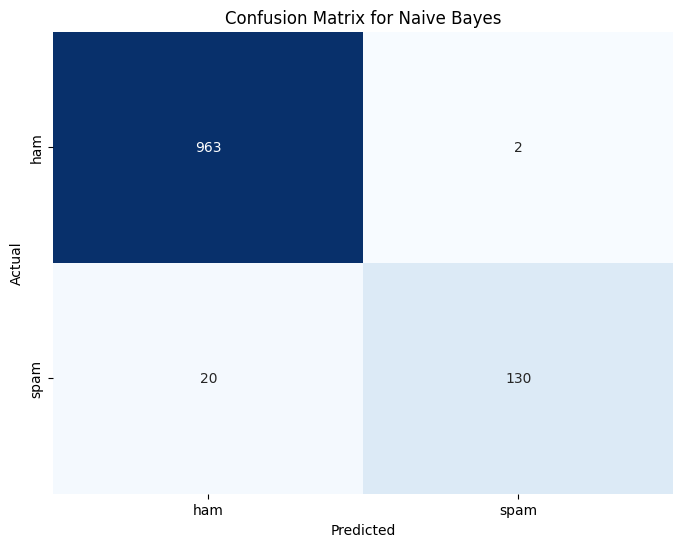

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix for Naive Bayes
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)
print("Naive Bayes Model:")
print(f"Accuracy: {nb_accuracy}")
print(nb_report)
print(nb_confusion_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nb_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


# Support Vector Visualization

SVM Model:
Accuracy: 0.979372197309417
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix for SVM:
[[963   2]
 [ 19 131]]


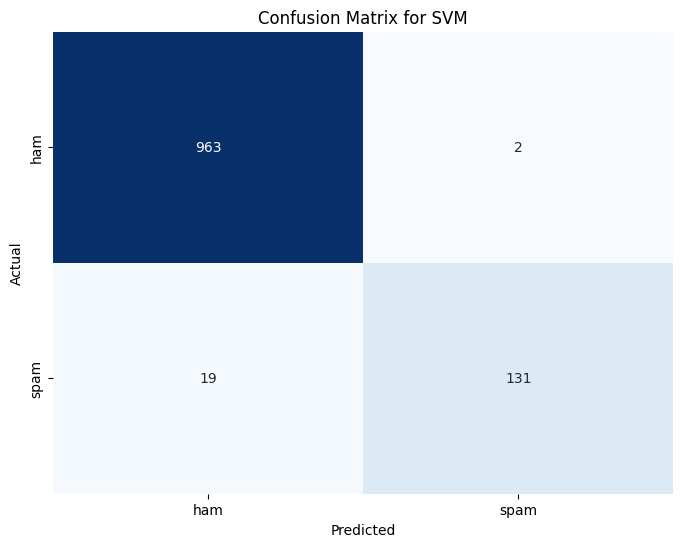

In [ ]:
# Print the SVM model's accuracy and classification report
print("SVM Model:")
print(f"Accuracy: {svm_accuracy}")
print(svm_report)

# Generate confusion matrix for SVM
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
# Print the confusion matrix values
print("Confusion Matrix for SVM:")
print(svm_confusion_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()



Optimized Naive Bayes Model (alpha=0.1):
Accuracy: 0.9802690582959641
 Optimized Confusion Matrix for Naive Bayes:
[[963   2]
 [ 20 130]]


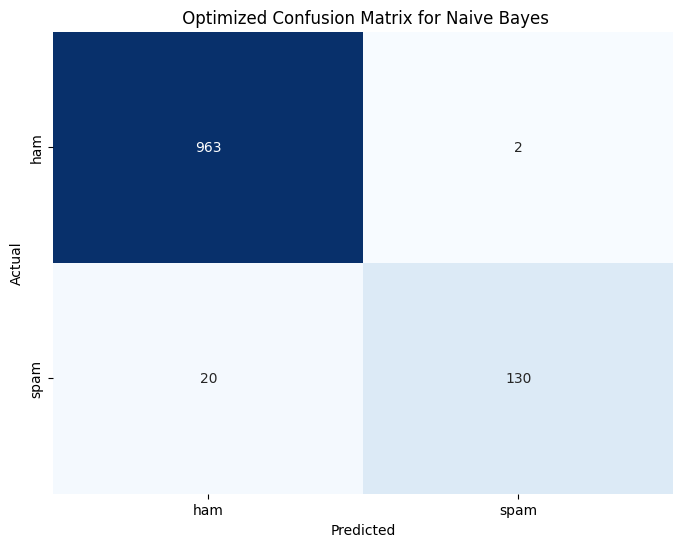

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Optimize the Naive Bayes model (Alpha tuning)
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to test
alphas = [0.01, 0.1, 1.0, 10.0]

# Create a parameter grid for GridSearchCV
param_grid = {'alpha': alphas}

# Initialize the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Perform grid search to find the best alpha
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best alpha value from the grid search
best_alpha = grid_search.best_params_['alpha']

# Train the model with the best alpha
nb_model = MultinomialNB(alpha=best_alpha)
nb_model.fit(X_train, y_train)

# Evaluate the optimized model
nb_predictions = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, nb_predictions)
print(f"Optimized Naive Bayes Model (alpha={best_alpha}):")
print(f"Accuracy: {accuracy}")
# Print the confusion matrix values
print(" Optimized Confusion Matrix for Naive Bayes:")
print(nb_confusion_matrix)

# Generate confusion matrix for Naive Bayes
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nb_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(' Optimized Confusion Matrix for Naive Bayes')
plt.show()




[[962   3]
 [ 20 130]]


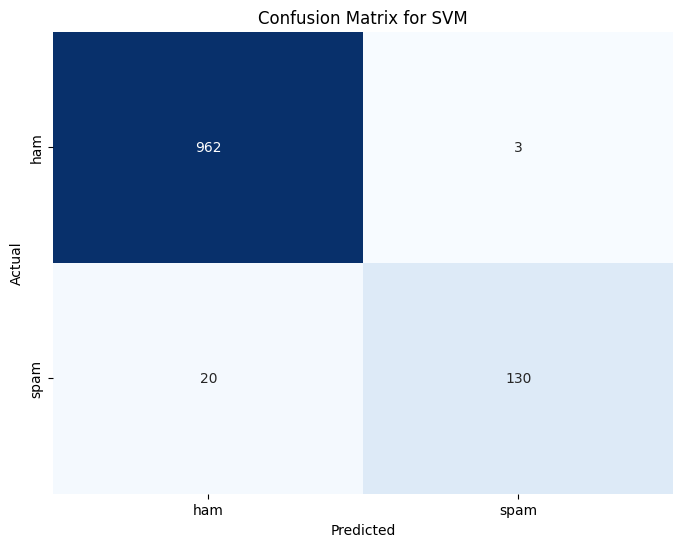

In [ ]:
# Generate confusion matrix for SVM
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
print(svm_confusion_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()


# Optimize and Evaluate Naive Bayes Model:

Naive Bayes Model:
Accuracy: 0.9811659192825112
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

[[964   1]
 [ 20 130]]


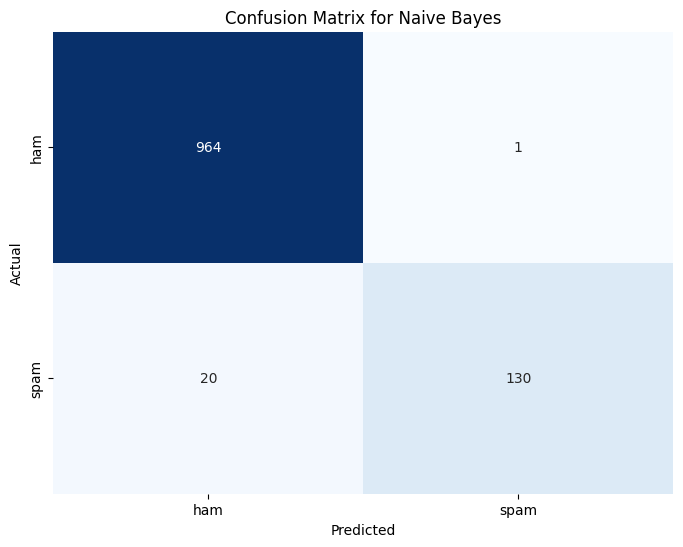

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Optimize Naive Bayes model (adjust as needed)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Evaluate the Naive Bayes model
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)

# Print accuracy and confusion matrix
print("Naive Bayes Model:")
print(f"Accuracy: {nb_accuracy}")
print(classification_report(y_test, nb_predictions))
print(nb_confusion_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nb_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


# Optimize and Evaluate SVM Model:

Optimized SVM Model:
Accuracy: 0.9811659192825112
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Optimized Confusion Matrix
[[963   2]
 [ 19 131]]


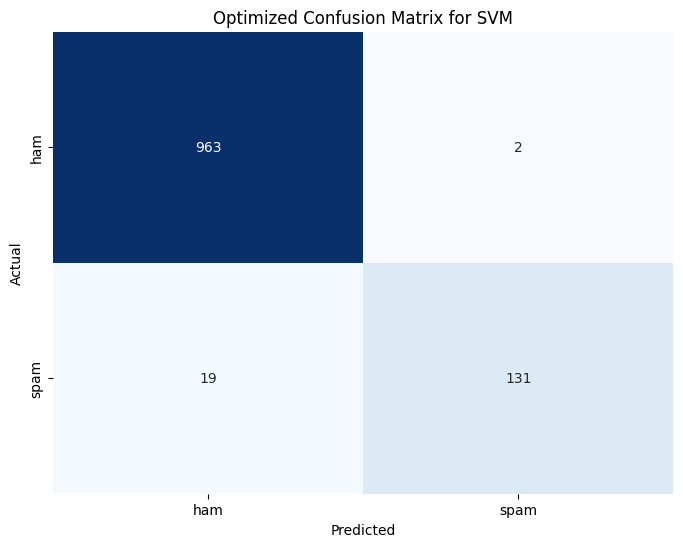

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Optimize SVM model (adjust as needed)
param_grid_svm = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10]
}
svm_model = SVC()
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
best_kernel = grid_search_svm.best_params_['kernel']
best_C = grid_search_svm.best_params_['C']

svm_model = SVC(kernel=best_kernel, C=best_C)
svm_model.fit(X_train, y_train)

# Evaluate the SVM model
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

# Print accuracy and confusion matrix for SVM
print("Optimized SVM Model:")
print(f"Accuracy: {svm_accuracy}")
print(classification_report(y_test, svm_predictions))
print("Optimized Confusion Matrix")
print(svm_confusion_matrix)

# Plot confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(svm_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Optimized Confusion Matrix for SVM')
plt.show()
